In [1]:
#textblob

In [4]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

%matplotlib inline

In [3]:
df = pd.read_csv('/Users/christinemagnotta/RDShipWars/cheronica.csv')

In [4]:
df

,tweets,quote_status,language,favorite_count,retweet_count,time,id
0,cheronica is hot why lie https://t.co/kAR7kTcd1D,True,en,1,0,2021-02-27 17:34:02,1365716836675850242
1,@tiedu2me OMGGG CHERONICA !!,False,en,0,0,2021-02-27 17:32:26,1365716435725615104
2,RT @choniswitches2: I’ll leave the fandom. my ...,True,en,0,1,2021-02-27 17:24:39,1365714477707051013
3,I’ll leave the fandom. my nerves i can take bu...,True,en,16,1,2021-02-27 17:22:24,1365713910637207553
4,waiting for my cheronica scenes https://t.co/B...,False,en,0,0,2021-02-27 09:06:59,1365589233386229762
...,...,...,...,...,...,...,...
58,@jessdamnday hahaha ur good\n- top fav charact...,False,en,2,0,2021-02-21 16:11:30,1363521742057189380
59,@klainescandIes — top fav characters:\n1.veron...,False,en,1,0,2021-02-21 15:32:58,1363512042674659334
60,"@lamercenairex i watched bf, i will watch give...",False,en,1,0,2021-02-20 10:44:23,1363077029441249282
61,no bc at this point i will take just about any...,False,en,1,0,2021-02-20 00:03:48,1362915820494536711


In [5]:
from textblob import TextBlob

In [9]:
df[['polarity', 'subjectivity']] = df['tweets'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [10]:
df

,tweets,quote_status,language,favorite_count,retweet_count,time,id,polarity,subjectivity
0,cheronica is hot why lie https://t.co/kAR7kTcd1D,True,en,1,0,2021-02-27 17:34:02,1365716836675850242,0.250000,0.850000
1,@tiedu2me OMGGG CHERONICA !!,False,en,0,0,2021-02-27 17:32:26,1365716435725615104,0.000000,0.000000
2,RT @choniswitches2: I’ll leave the fandom. my ...,True,en,0,1,2021-02-27 17:24:39,1365714477707051013,0.000000,0.400000
3,I’ll leave the fandom. my nerves i can take bu...,True,en,16,1,2021-02-27 17:22:24,1365713910637207553,0.000000,0.400000
4,waiting for my cheronica scenes https://t.co/B...,False,en,0,0,2021-02-27 09:06:59,1365589233386229762,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
58,@jessdamnday hahaha ur good\n- top fav charact...,False,en,2,0,2021-02-21 16:11:30,1363521742057189380,0.253333,0.446667
59,@klainescandIes — top fav characters:\n1.veron...,False,en,1,0,2021-02-21 15:32:58,1363512042674659334,-0.033333,0.433333
60,"@lamercenairex i watched bf, i will watch give...",False,en,1,0,2021-02-20 10:44:23,1363077029441249282,0.000000,0.000000
61,no bc at this point i will take just about any...,False,en,1,0,2021-02-20 00:03:48,1362915820494536711,0.000000,0.000000


In [11]:
#df[['polarity', 'subjectivity']] = df['tweets'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [12]:
jeronica_df = pd.read_csv('/Users/christinemagnotta/RDShipWars/jeronica_df2.csv')

In [17]:
jeronica_df[['polarity', 'subjectivity']] = jeronica_df['tweets'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [18]:
jeronica_df

,tweets,quote_status,language,favorite_count,retweet_count,time,id,rating,polarity,subjectivity
0,RT @RiverdaleRefer1: They way he looks at her....,False,en,0,7,2021-03-03 00:27:19,1366908008517619712,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,0.000000
1,RT @LaBella_Aria: I love the bickering between...,False,en,0,2,2021-03-03 00:27:05,1366907947293552642,"{'neg': 0.0, 'neu': 0.689, 'pos': 0.311, 'comp...",0.712500,0.675000
2,"RT @shereeniha: As much as I like Varchie, I a...",False,en,0,2,2021-03-03 00:24:29,1366907294412374017,"{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'comp...",0.350000,0.350000
3,@slowburnsftw I was just thinking this! “I’ve ...,False,en,7,0,2021-03-02 17:16:56,1366799696329646083,"{'neg': 0.024, 'neu': 0.919, 'pos': 0.057, 'co...",0.000000,0.400000
4,"Jeronica is cursed, I don’t ship anymore https...",False,en,3,0,2021-03-02 16:40:12,1366790453044129792,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
165,RT @BarrosEsquerdo: I find it interesting how ...,False,en,0,9,2021-02-23 21:56:14,1364333269634998278,"{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'comp...",0.375000,0.750000
166,@ShellyLahey Guess this is where she goes full...,False,en,3,0,2021-02-23 19:59:16,1364303834722443270,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.116667,0.183333
167,"Happy Birthday to lovely friend, fellow jeroni...",False,en,0,0,2021-02-23 19:00:08,1364288954539900928,"{'neg': 0.038, 'neu': 0.455, 'pos': 0.507, 'co...",0.560000,0.670000
168,Went back to when she started hating Jeronica ...,False,en,7,0,2021-02-23 13:24:31,1364204495144509444,"{'neg': 0.202, 'neu': 0.798, 'pos': 0.0, 'comp...",0.000000,0.000000


In [19]:
cheronicaBlob = pd.read_csv('/Users/christinemagnotta/RDShipWars/cheronica_df.csv')

In [26]:
cheronicaBlob[['polarity', 'subjectivity']] = cheronicaBlob['tweets'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [27]:
cheronicaBlob

,tweets,quote_status,language,favorite_count,retweet_count,time,id,rating,polarity,subjectivity
0,cheronica is hot why lie https://t.co/kAR7kTcd1D,True,en,1,0,2021-02-27 17:34:02,1365716836675850242,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.250000,0.850000
1,@tiedu2me OMGGG CHERONICA !!,False,en,0,0,2021-02-27 17:32:26,1365716435725615104,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,0.000000
2,RT @choniswitches2: I’ll leave the fandom. my ...,True,en,0,1,2021-02-27 17:24:39,1365714477707051013,"{'neg': 0.142, 'neu': 0.858, 'pos': 0.0, 'comp...",0.000000,0.400000
3,I’ll leave the fandom. my nerves i can take bu...,True,en,16,1,2021-02-27 17:22:24,1365713910637207553,"{'neg': 0.131, 'neu': 0.869, 'pos': 0.0, 'comp...",0.000000,0.400000
4,waiting for my cheronica scenes https://t.co/B...,False,en,0,0,2021-02-27 09:06:59,1365589233386229762,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
58,@jessdamnday hahaha ur good\n- top fav charact...,False,en,2,0,2021-02-21 16:11:30,1363521742057189380,"{'neg': 0.0, 'neu': 0.477, 'pos': 0.523, 'comp...",0.253333,0.446667
59,@klainescandIes — top fav characters:\n1.veron...,False,en,1,0,2021-02-21 15:32:58,1363512042674659334,"{'neg': 0.0, 'neu': 0.523, 'pos': 0.477, 'comp...",-0.033333,0.433333
60,"@lamercenairex i watched bf, i will watch give...",False,en,1,0,2021-02-20 10:44:23,1363077029441249282,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,0.000000
61,no bc at this point i will take just about any...,False,en,1,0,2021-02-20 00:03:48,1362915820494536711,"{'neg': 0.079, 'neu': 0.721, 'pos': 0.2, 'comp...",0.000000,0.000000


In [7]:
choniBlob = pd.read_csv('/Users/christinemagnotta/RDShipWars/data/choni.csv.csv')

In [9]:
choniBlob[['polarity', 'subjectivity']] = choniBlob['tweets'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [10]:
choniBlob

,tweets,quote_status,language,favorite_count,retweet_count,time,id,processed_text,cleaned_tweets,polarity,subjectivity
0,RT @chonigif: the roles have been reversed 👀\n...,False,en,0,55,2021-02-27 05:07:08,1365528872494727173,"['roles', 'reversed', '2x16', '5x07', 'riverda...",roles reversed 2x16 5x07 riverdale choni,0.000000,0.000000
1,RT @BarchieUpdates: Rachel Talalay directed th...,False,en,0,30,2021-02-27 04:58:47,1365526773782302722,"['rachel', 'talalay', 'directed', 'episode', '...",rachel talalay directed episode getting barchi...,0.000000,0.000000
2,Stop. Shipping. Cheryl. With. Men. She. Is. A....,False,en,5,1,2021-02-27 04:57:21,1365526410257907713,"['stop', 'shipping', 'cheryl', 'men', 'lesbian']",stop shipping cheryl men lesbian,0.000000,0.000000
3,RT @chonistyles: CHONI ARE THE MAIN STORYLINE ...,False,en,0,36,2021-02-27 04:55:52,1365526040425205762,"['choni', 'main', 'storyline', '5x08']",choni main storyline 5x08,0.166667,0.333333
4,RT @tcpazs: barchie and choni besties,True,en,0,3,2021-02-27 04:40:44,1365522231158333440,"['barchie', 'choni', 'besties']",barchie choni besties,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
697,@rcnnnie As much as I do like some of the het ...,False,en,4,0,2021-02-26 01:31:22,1365112187233079296,"['much', 'like', 'het', 'ships', 'really', 'wa...",much like het ships really want choni kangs wa...,0.225000,0.287500
698,@rcnnnie Give me Choni over B*rchie sex any da...,False,en,7,0,2021-02-26 01:27:58,1365111330638684162,"['give', 'choni', 'b', 'rchie', 'sex', 'day', ...",give choni b rchie sex day heck give kangs sex...,0.000000,0.000000
699,I'm sorry but barchie got two sex scenes durin...,False,en,50,1,2021-02-26 01:27:00,1365111086945550345,"['sorry', 'barchie', 'got', 'two', 'sex', 'sce...",sorry barchie got two sex scenes two episodes ...,-0.250000,1.000000
700,@chonicarrington Omg yes and barchie having mo...,False,en,1,0,2021-02-26 01:26:12,1365110887154126852,"['omg', 'yes', 'barchie', 'sex', 'scene', '2',...",omg yes barchie sex scene 2 episodes choni 3 s...,0.250000,0.625000


In [11]:
choniBlob.dtypes

tweets             object
quote_status         bool
language           object
favorite_count      int64
retweet_count       int64
time               object
id                  int64
processed_text     object
cleaned_tweets     object
polarity          float64
subjectivity      float64
dtype: object

In [12]:
choniBlob.to_csv('RDShipWars/choniBlob.csv', index=False)

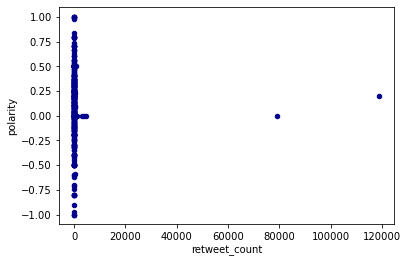

In [13]:
ax1 = choniBlob.plot.scatter(x='retweet_count',
                      y='polarity',
                      c='DarkBlue')

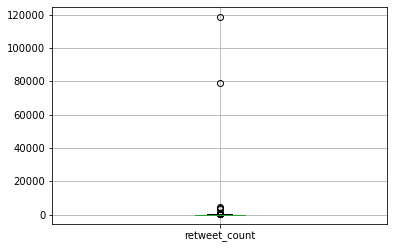

In [14]:
boxplot = choniBlob.boxplot(column=['retweet_count'])

In [16]:
bugheadBlob = pd.read_csv('/Users/christinemagnotta/RDShipWars/data/bughead_df.csv.csv')

In [17]:
bugheadBlob[['polarity', 'subjectivity']] = bugheadBlob['tweets'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [32]:
bugheadBlob

,tweets,quote_status,language,favorite_count,retweet_count,time,id,rating,polarity,subjectivity
0,Bughead was never meant to be a main couple on...,False,en,0,0,2021-03-03 00:56:53,1366915446918828033,"{'neg': 0.126, 'neu': 0.834, 'pos': 0.04, 'com...",0.166667,0.333333
1,(especially on bughead day) HELP,False,en,0,0,2021-03-03 00:56:50,1366915433287217152,"{'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'comp...",0.000000,1.000000
2,her little smile after it END OF DISCUSSION BU...,False,en,3,0,2021-03-03 00:54:58,1366914965056192515,"{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'comp...",0.056250,0.300000
3,RT @lovemesometopaz: if you still think bughea...,False,en,0,97,2021-03-03 00:54:34,1366914865089101832,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.166667,0.333333
4,"RT @BugheadGif: four years ago today, jughead ...",False,en,0,74,2021-03-03 00:54:13,1366914777289744384,"{'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compou...",0.525000,0.666667
...,...,...,...,...,...,...,...,...,...,...
5027,"@BarchieUpdates Noo, bughead #4ever",False,en,0,0,2021-02-23 12:47:55,1364195284327276546,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,0.000000
5028,meu pai me mandando gif de bughead KKKKKKKKVOU...,False,en,0,0,2021-02-23 12:42:31,1364193924840108034,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,0.000000
5029,@barchiecanons5 @rytbone @Barchiedaily He may ...,False,en,1,0,2021-02-23 12:40:35,1364193438720270344,"{'neg': 0.09, 'neu': 0.781, 'pos': 0.129, 'com...",-0.250000,0.888889
5030,"@ChaosPper @NessaJ785 Yeah, IMO bughead is tox...",False,en,0,0,2021-02-23 11:49:09,1364180494599016451,"{'neg': 0.096, 'neu': 0.812, 'pos': 0.091, 'co...",0.066667,0.350000


In [18]:
bugheadBlob.to_csv('RDShipWars/bugheadBlob.csv', index=False)

In [33]:
faliceBlob = pd.read_csv('/Users/christinemagnotta/RDShipWars/falice_df2.csv')

In [34]:
faliceBlob[['polarity', 'subjectivity']] = faliceBlob['tweets'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [35]:
faliceBlob

,tweets,quote_status,language,favorite_count,retweet_count,time,id,rating,polarity,subjectivity
0,RT @softfalice: melissa and joey moments that ...,False,en,0,5,2021-02-27 05:47:04,1365538924492320773,"{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compou...",0.000,0.0
1,@mishacollins\n lets sue the Riverdale writers...,False,en,0,0,2021-02-27 05:31:58,1365535122942910464,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0
2,@mishacollins lets sue the Riverdale writers a...,False,en,0,0,2021-02-27 05:31:41,1365535050641547265,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0
3,"The pinky TEASE, I miss season 2 falice https:...",True,en,4,0,2021-02-27 04:10:05,1365514517325742082,"{'neg': 0.481, 'neu': 0.519, 'pos': 0.0, 'comp...",0.000,0.0
4,RT @amicksbabe: I want fp’s letter @RiverdaleW...,False,en,0,5,2021-02-27 03:58:02,1365511482591567874,"{'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'comp...",0.000,0.0
...,...,...,...,...,...,...,...,...,...,...
221,@dioramick how’s falice doing?,False,en,24,0,2021-02-19 18:39:26,1362834192984383490,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0
222,RT @barchie_stan: rt if you wanna be mutuals👉🏻...,False,en,0,6,2021-02-19 18:10:13,1362826841141121025,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",-0.200,0.6
223,@barchiesdreams Honestly id replace veggie wit...,False,en,0,0,2021-02-19 15:57:27,1362793426861887493,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",0.600,0.9
224,@PRiveerdale Bughead and choni\n\nAnd young fa...,False,en,2,0,2021-02-19 15:57:06,1362793340668887043,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.100,0.4


In [36]:
tugheadBlob = pd.read_csv('/Users/christinemagnotta/RDShipWars/tughead2.csv')

In [37]:
tugheadBlob[['polarity', 'subjectivity']] = tugheadBlob['tweets'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [38]:
tugheadBlob

,tweets,quote_status,language,favorite_count,retweet_count,time,id,rating,polarity,subjectivity
0,I ship Jughead and Tabitha.\n\nWhat would that...,False,en,1,0,2021-02-26 02:44:33,1365130602274504711,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,0.000000
1,"RT @karyv_mp: @mgom_lp Tughead...wait no, that...",False,en,0,1,2021-02-25 21:48:28,1365056093261619202,"{'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'comp...",0.000000,0.000000
2,"@mgom_lp Tughead...wait no, that was Toni and ...",False,en,1,1,2021-02-25 21:47:49,1365055928198922244,"{'neg': 0.199, 'neu': 0.801, 'pos': 0.0, 'comp...",0.000000,0.000000
3,they’re setting tabithajones up just like they...,False,en,1,0,2021-02-25 08:58:18,1364862271298695169,"{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...",0.000000,0.000000
4,RT @Barchie18love: My thoughts.\n\n#barchie #r...,False,en,0,50,2021-02-25 04:19:25,1364792091604381696,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,0.000000
5,@rihdayaa i hope it sticks and not tughead,False,en,3,0,2021-02-25 03:38:33,1364781803488374784,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...",0.000000,0.000000
6,@Recap_Rewind @CW_Riverdale Loved it. #Riverda...,False,en,3,0,2021-02-25 03:15:02,1364775885476405249,"{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp...",0.300000,0.650000
7,@RiverdaleDark Surely the correct term would b...,False,en,2,0,2021-02-25 02:05:55,1364758494235271168,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...",0.500000,0.888889
8,RT @msprousexz: tughead means home🤲💕 https://t...,False,en,0,1,2021-02-25 01:25:37,1364748352286507010,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,0.000000
9,tughead means home🤲💕 https://t.co/Iinq3dxFfx,False,en,4,1,2021-02-25 01:24:04,1364747962555973636,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,0.000000


In [19]:
varchieBlob = pd.read_csv('/Users/christinemagnotta/RDShipWars/data/varchie_df2.csv.csv')

In [20]:
varchieBlob[['polarity', 'subjectivity']] = varchieBlob['tweets'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [21]:
varchieBlob

,tweets,quote_status,language,favorite_count,retweet_count,time,id,rating,processed_text,cleaned_tweets,polarity,subjectivity
0,RT @bettyandarchie4: If you are worried about ...,False,en,0,1,2021-02-27 05:19:52,1365532079258222592,"{'neg': 0.078, 'neu': 0.781, 'pos': 0.141, 'co...","['worried', 'barchie', 'set', 'gonna', 'varchi...",worried barchie set gonna varchie exes lovers ...,0.000000,1.000000
1,RT @SuperheroTVcom: VOTE: Riverdale Time Jump!...,False,en,0,557,2021-02-27 05:07:56,1365529076820307969,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...","['vote', 'riverdale', 'time', 'jump', 'archie'...",vote riverdale time jump archie amp betty like...,0.000000,0.000000
2,"RT @vcrchies: COME BACK TO ME, VARCHIE. YOUR S...",False,en,0,4,2021-02-27 04:37:46,1365521485029326849,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","['come', 'back', 'varchie', 'story', 'isnt', '...",come back varchie story isnt yet,0.000000,0.000000
3,I'm rewatching some #bughead scenes and I'm ki...,False,en,0,0,2021-02-27 04:37:29,1365521413990453248,"{'neg': 0.089, 'neu': 0.843, 'pos': 0.068, 'co...","['rewatching', 'bughead', 'scenes', 'kinda', '...",rewatching bughead scenes kinda soft ugh genui...,0.229683,0.506270
4,RT @winchesterbitxh: barchie has more chemistr...,False,en,0,44,2021-02-27 04:18:10,1365516550984376320,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","['barchie', 'chemistry', '2', 'episodes', 'var...",barchie chemistry 2 episodes varchie 5 seasons,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
3110,"i believe in the key party theory, varchie and...",False,en,5,0,2021-02-19 14:19:58,1362768896244252672,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...","['believe', 'key', 'party', 'theory', 'varchie...",believe key party theory varchie bughead take ...,-0.083333,0.583333
3111,we could've gotten a second varchie shower sce...,False,en,19,3,2021-02-19 14:18:50,1362768611346014210,"{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound...","['could', 'gotten', 'second', 'varchie', 'show...",could gotten second varchie shower scene veron...,0.000000,0.500000
3112,pretending this is varchie. https://t.co/3oGLt...,False,en,21,0,2021-02-19 14:16:50,1362768108205834251,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...","['pretending', 'varchie']",pretending varchie,0.000000,0.000000
3113,Varchie in the promo of episode 506 🥰 https://...,False,en,6,0,2021-02-19 14:06:56,1362765616160079874,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","['varchie', 'promo', 'episode', '506']",varchie promo episode 506,0.000000,0.000000


In [23]:
varchieBlob.to_csv('RDShipWars/varchieBlob.csv', index=False)